Upload these files, to smoothly run the project
## Human_activity_test.csv NOT REQUIRED
## Human_activity_train.csv NOT REQUIRED




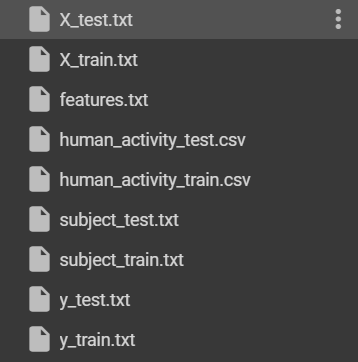

In [1]:
#loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

#Loading the dataset & Preprocessing


In [ ]:
#get feature names from the file features.txt,
features = list()
with open('/content/features.txt') as f:
  features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [ ]:
seen = set()
unique_features = []
for idx, x in enumerate(features):
  if x not in seen:
    unique_features.append(x)
    seen.add(x)
  elif x + 'n' not in seen:
    unique_features.append(x + 'n')
    seen.add(x + 'n')
  else:
    unique_features.append(x + 'nn')
    seen.add(x + 'nn')
len(unique_features)

561

The Column names are made unique now we can make a dataframe as follows:
1. Make a Dataframe from Xtrain and passing the column names that we got above
2. Add the subject column to it
3. Build another dataframe for Ytrain using the ytrain.txt file along with labels
4. Add that data frame with Activity name column in the train Dataframe

In [ ]:
X_train = pd.read_csv('/content/X_train.txt', delim_whitespace=True, header=None, names=unique_features)
X_train.head()

#add subject column to the dataframe
X_train['subject'] = pd.read_csv('/content/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('/content/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
4:'SITTING', 5:'STANDING',6:'LAYING'})

#put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.head()

<ipython-input-158-15a06dbf51b2>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train['subject'] = pd.read_csv('/content/subject_train.txt', header=None, squeeze=True)
<ipython-input-158-15a06dbf51b2>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('/content/y_train.txt', names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


#Now we can do the same for the Test files

In [ ]:
#get the data from txt files to pandas dataframe
X_test = pd.read_csv('/content/X_test.txt', delim_whitespace=True, header=None, names=unique_features)

#add subject column to the dataframe
X_test['subject'] = pd.read_csv('/content/subject_test.txt', header=None, squeeze=True)

#get y labels from the txt file
y_test = pd.read_csv('/content/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
4:'SITTING', 5:'STANDING',6:'LAYING'})

#put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.head()

<ipython-input-159-ffb8eafdcdcc>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test['subject'] = pd.read_csv('/content/subject_test.txt', header=None, squeeze=True)
<ipython-input-159-ffb8eafdcdcc>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('/content/y_test.txt', names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


#Checking Summary statistics and finding anomalies

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAcc-mean()-X to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 564 entries, tBodyAcc-mean()-X to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 12.7+ MB


In [ ]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


In [ ]:
test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427,3.577876
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984,1.740348
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000,1.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000,2.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000,4.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000,5.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000,6.000000


#Checking if there are any null values

In [ ]:
train.isnull().sum().sort_values(ascending =  False)

tBodyAcc-mean()-X            0
fBodyAccJerk-skewness()-Z    0
fBodyAccJerk-meanFreq()-Y    0
fBodyAccJerk-meanFreq()-Z    0
fBodyAccJerk-skewness()-X    0
                            ..
tBodyGyroJerk-iqr()-Z        0
tBodyGyroJerk-iqr()-Y        0
tBodyGyroJerk-iqr()-X        0
tBodyGyroJerk-energy()-Z     0
ActivityName                 0
Length: 564, dtype: int64

#Only 1 value is missing let's see if it is the same row or multiple

In [ ]:
train[train['fBodyAccJerk-kurtosis()-X'].isnull()]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName


#Okay so it is only 1 row i-e 5372 we can drop it

In [ ]:
train.dropna(axis = 0)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS


In [ ]:
test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
ActivityName            0
Length: 564, dtype: int64

#Now there is no missing values we will now investigate if there are any duplicates

In [ ]:
print(f'There are {train.duplicated().sum()} duplicates in the train set')
print(f'There are {test.duplicated().sum()} duplicates in the test set')


There are 0 duplicates in the train set
There are 0 duplicates in the test set


In [ ]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

#Let us investigate if the data is balanced or skewed

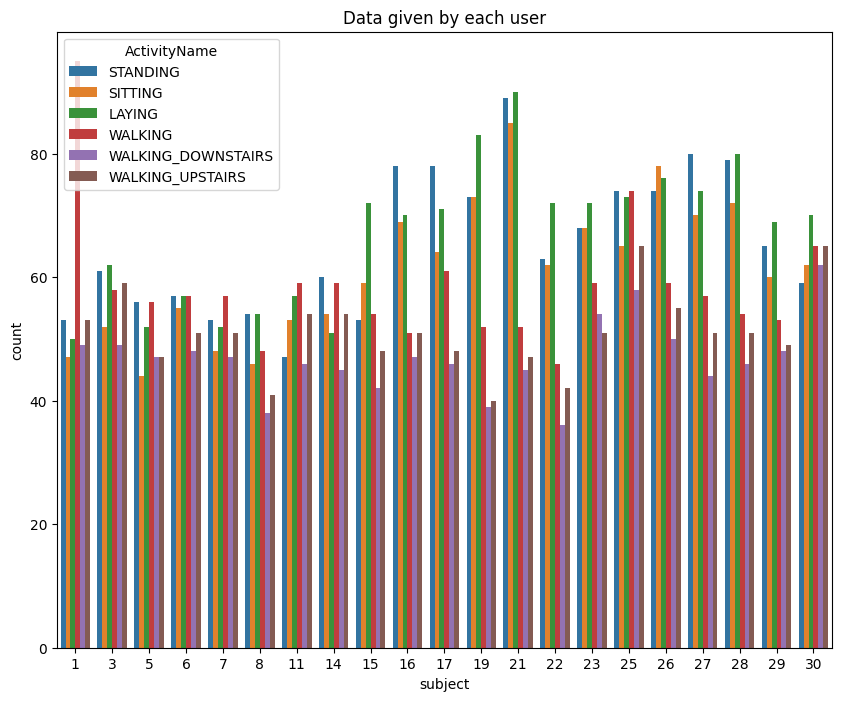

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data = train, x = "subject", hue = "ActivityName")
plt.title("Data given by each user")
plt.show()

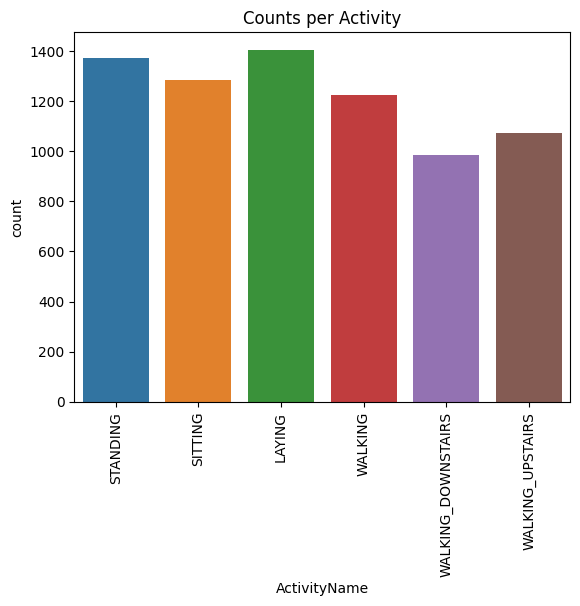

In [ ]:
#If data per activity is distributed properly
plt.title("Counts per Activity")
sns.countplot(data = train, x = "ActivityName", hue = 'ActivityName')
plt.xticks(rotation = 90)
plt.show()

#Data is (Almost) balanced so no need to apply any balancing techniques

In [ ]:
# There are unnecessary brackets in the column names let just remove them
columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')
# print(columns)
train.columns = columns
test.columns = columns

<ipython-input-172-e23212b41ad5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
<ipython-input-172-e23212b41ad5>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]','')
<ipython-input-172-e23212b41ad5>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


#All set with the Processing I will prefer to export these files as csv for further ease of use

In [ ]:
train.to_csv('human_activity_train.csv', index = False )
test.to_csv('human_activity_test.csv', index = False )

# Let us import these newly created train and test files to further process for machine learning purposes

In [ ]:
train = pd.read_csv('/content/human_activity_train.csv')
test = pd.read_csv('/content/human_activity_test.csv')
print(f'the size of the train dataframe is {train.shape[0]} rows and {train.shape[1]} columns')
print(f'the size of the test dataframe is {test.shape[0]} rows and {test.shape[1]} columns')

the size of the train dataframe is 7352 rows and 564 columns
the size of the test dataframe is 2947 rows and 564 columns


#Let us separately classify activities based on motion and look for sensors with most importance

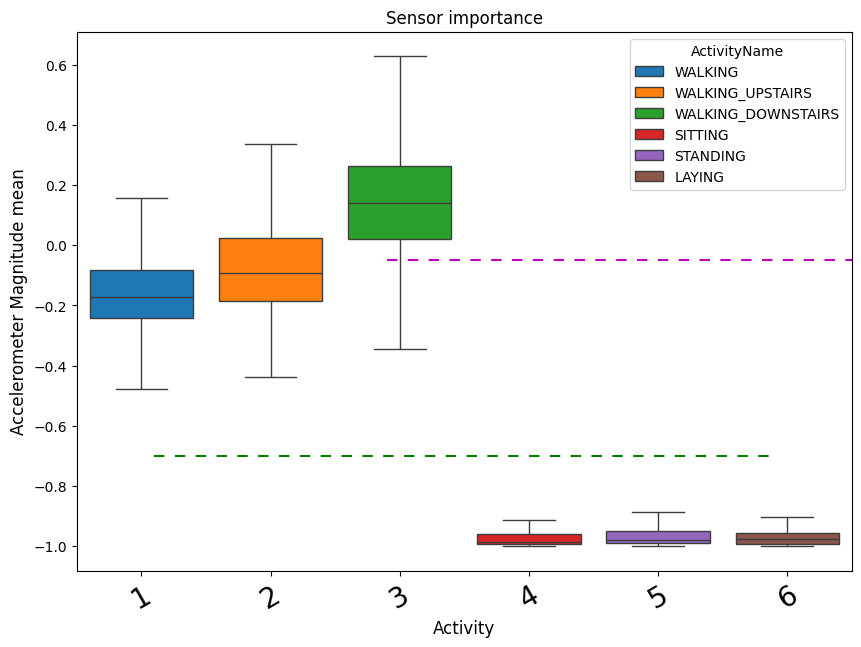

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1, hue = 'ActivityName')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 12)
plt.xlabel("Activity", size=12)
plt.ylabel('Accelerometer Magnitude mean', size=12)
plt.xticks(rotation=30, fontsize=20)
plt.show()

#Applying PCA for Dimensionality Reduction

##1. Handling High Dimensional Data:
The given dataset has a large number of features (561 features). Working with high dimensional data can be computationally expensive and can lead to the curse of dimensionality. PCA helps reduce the dimensionality while preserving most of the important information/variance in the data.

##2. Dealing with Multicollinearity:
In datasets with many features, there is often a high degree of correlation or redundancy between the features. PCA identifies the principal components, which are new uncorrelated features that are linear combinations of the original features. This helps in reducing multicollinearity.

##3. Improving Clustering Performance:
When dealing with high dimensional data, distance measures can become increasingly meaningless and less reliable (curse of dimensionality). By reducing the dimensions using PCA, we can potentially make the cluster assignments more accurate and robust.

In [ ]:
from sklearn.decomposition import PCA
merged_data = pd.concat([train, test])
merged_data = merged_data.dropna(axis = 0)
X = merged_data.drop(['subject', 'Activity','ActivityName'], axis=1)
y = merged_data['Activity']

pca = PCA(n_components=0.99)
pca.fit(X)
x_reduced = pca.transform(X)

print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

Original number of features 561 Reduced number of features 157


#Split the data to Train and Test sets from X y and x_reduced i-e less dimension varient

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.3, shuffle=True, random_state=42)

#Preparing KMeans along with Evaluation Metrics

In [ ]:
# Elbow method to find optimal K for original set without PCA

def kmeans(data, maxK, K=None):
  wcss = []
  result = []
  if K is None:
    for k in range(2, maxK):
      kmeans = KMeans(n_clusters=k, random_state=42)
      labels = kmeans.fit_predict(data)
      # Calculate evaluation metrics
      silhouette_avg = metrics.silhouette_score(data, labels)
      calinski_harabasz = metrics.calinski_harabasz_score(data, labels)
      davies_bouldin = metrics.davies_bouldin_score(data, labels)
      # Cluster statistics
      n_clusters = len(np.unique(labels))
      cluster_sizes = [sum(labels == i) for i in range(n_clusters)]
      # Print results
      print(f"Number of Clusters: {n_clusters}")
      print(f"Cluster Sizes: {cluster_sizes}")
      print(f"Silhouette Score: {silhouette_avg:.4f}")
      print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
      print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
      print("-----------------------------------")

      results = {
        'labels' : labels,
        'n_clusters': n_clusters,
        'cluster_sizes': cluster_sizes,
        'silhouette_score': silhouette_avg,
        'calinski_harabasz_score': calinski_harabasz,
        'davies_bouldin_score': davies_bouldin
      }
      result.append(results)
      wcss.append(kmeans.inertia_)

  else:
      kmeans = KMeans(n_clusters=K, random_state=42)
      labels = kmeans.fit_predict(data)
      # Calculate evaluation metrics
      silhouette_avg = metrics.silhouette_score(data, labels)
      calinski_harabasz = metrics.calinski_harabasz_score(data, labels)
      davies_bouldin = metrics.davies_bouldin_score(data, labels)
      n_clusters = len(np.unique(labels))
      cluster_sizes = [sum(labels == i) for i in range(n_clusters)]

      # Print results
      print(f"Number of Clusters: {n_clusters}")
      print(f"Labels: {labels}")
      print(f"Cluster Sizes: {cluster_sizes}")
      print(f"Silhouette Score: {silhouette_avg:.4f}")
      print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")
      print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
      print("-----------------------------------")

      results = {
        'labels' : labels,
        'n_clusters': n_clusters,
        'cluster_sizes': cluster_sizes,
        'silhouette_score': silhouette_avg,
        'calinski_harabasz_score': calinski_harabasz,
        'davies_bouldin_score': davies_bouldin
      }
      result.append(results)
      wcss.append(kmeans.inertia_)

  return wcss, result

#Ploting the Elbow Curve

#For Evaluation of Clustering Algorithms like Kmeans and DBScan we can go through
1. Silhouette Score:
Measures how well each data point fits into its assigned cluster compared to other clusters. Higher is better.

2. Calinski-Harabasz Score:
Measures the ratio of between-cluster dispersion to within-cluster dispersion. Higher is better.

3. Davies-Bouldin Score:
Measures the average similarity between clusters, where lower values indicate better separation.

In [ ]:
km = kmeans(x_train, 11)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 2
Cluster Sizes: [3299, 3910]
Silhouette Score: 0.4806
Calinski-Harabasz Score: 9497.9923
Davies-Bouldin Score: 0.8448
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 3
Cluster Sizes: [1341, 3893, 1975]
Silhouette Score: 0.3226
Calinski-Harabasz Score: 5604.1184
Davies-Bouldin Score: 1.6892
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 4
Cluster Sizes: [1335, 2531, 1972, 1371]
Silhouette Score: 0.1855
Calinski-Harabasz Score: 4379.6321
Davies-Bouldin Score: 2.0446
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 5
Cluster Sizes: [1324, 1731, 1975, 1258, 921]
Silhouette Score: 0.1630
Calinski-Harabasz Score: 3533.0638
Davies-Bouldin Score: 2.0760
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 6
Cluster Sizes: [1258, 477, 1367, 1455, 1731, 921]
Silhouette Score: 0.1331
Calinski-Harabasz Score: 2977.0012
Davies-Bouldin Score: 2.2909
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 7
Cluster Sizes: [604, 532, 769, 1364, 1028, 1508, 1404]
Silhouette Score: 0.1166
Calinski-Harabasz Score: 2586.7803
Davies-Bouldin Score: 2.4131
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 8
Cluster Sizes: [592, 1127, 1509, 212, 926, 1027, 781, 1035]
Silhouette Score: 0.1030
Calinski-Harabasz Score: 2290.9836
Davies-Bouldin Score: 2.4962
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 9
Cluster Sizes: [1509, 413, 781, 855, 1098, 269, 592, 665, 1027]
Silhouette Score: 0.1109
Calinski-Harabasz Score: 2066.0933
Davies-Bouldin Score: 2.4514
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 10
Cluster Sizes: [414, 1059, 1421, 656, 677, 856, 1095, 580, 251, 200]
Silhouette Score: 0.1064
Calinski-Harabasz Score: 1882.7880
Davies-Bouldin Score: 2.4458
-----------------------------------


#Selecting the best K-Value from the Elbow plot

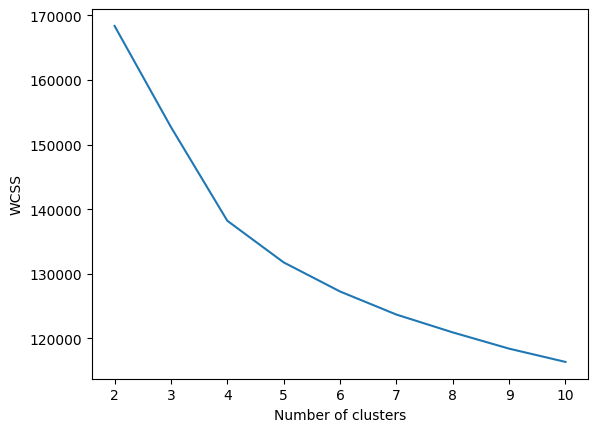

In [ ]:
plt.plot(range(2, 11), km[0])
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


##The plot shows how clusters change with K values. Each K tests cluster quality with sum of squares. At four clusters, quality improves less with more K. So ***4*** is best as adding more does not help much more. The elbow is at four clusters, making this the good number for separating the data set.

##Lets now evaluate both the train sets (with PCA and without PCA ) with K = 4

In [ ]:
print("K Means without PCA")
km_without_pca = kmeans(x_train, 2, 4)
print("K Means with PCA")
km_with_pca = kmeans(x_train_pca, 2, 4)

K Means without PCA


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 4
Labels: [1 1 2 ... 2 1 2]
Cluster Sizes: [1335, 2531, 1972, 1371]
Silhouette Score: 0.1855
Calinski-Harabasz Score: 4379.6321
Davies-Bouldin Score: 2.0446
-----------------------------------
K Means with PCA


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 4
Labels: [2 2 3 ... 3 2 3]
Cluster Sizes: [1325, 1371, 2532, 1981]
Silhouette Score: 0.1887
Calinski-Harabasz Score: 4506.2616
Davies-Bouldin Score: 2.0150
-----------------------------------


There's a clear difference of performance and better clustering fit using the PCA set however, let us visualize the clusters to further investigate them

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


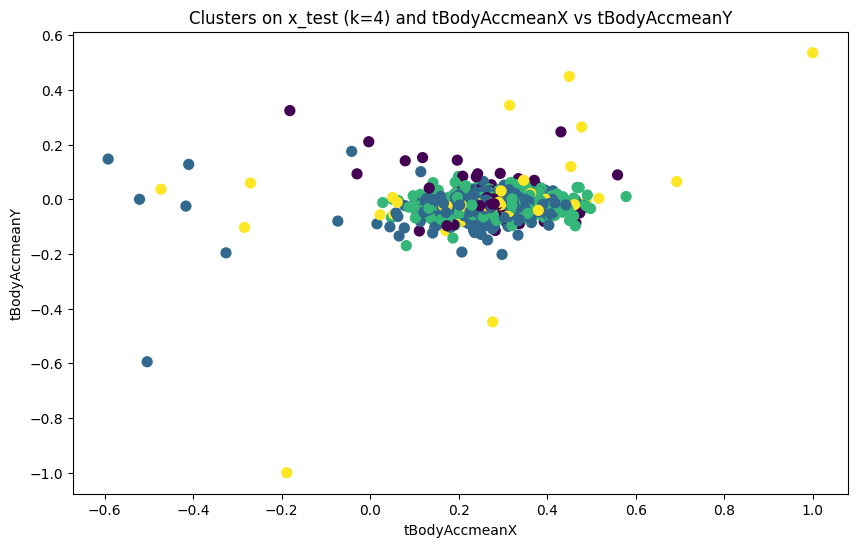

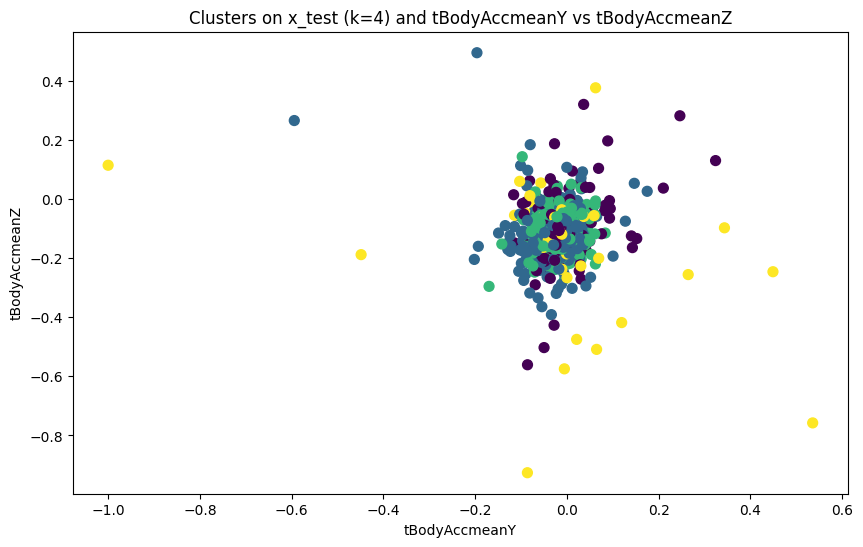

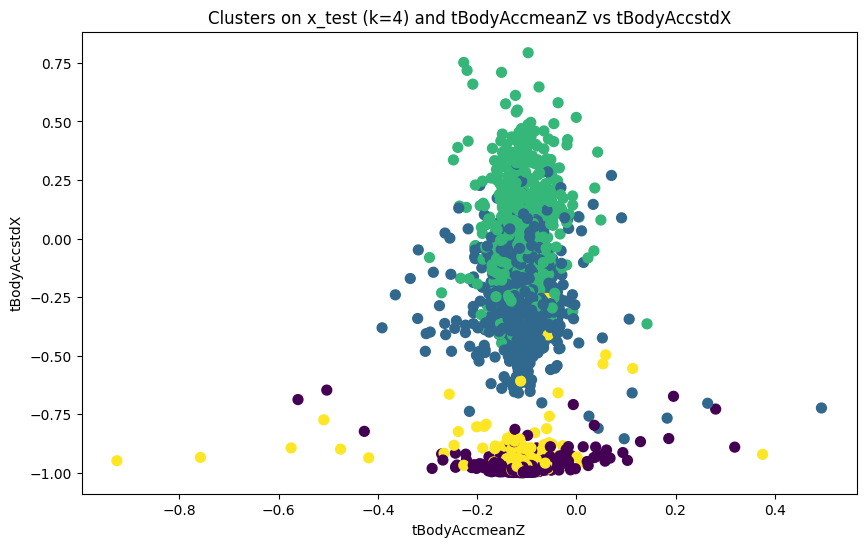

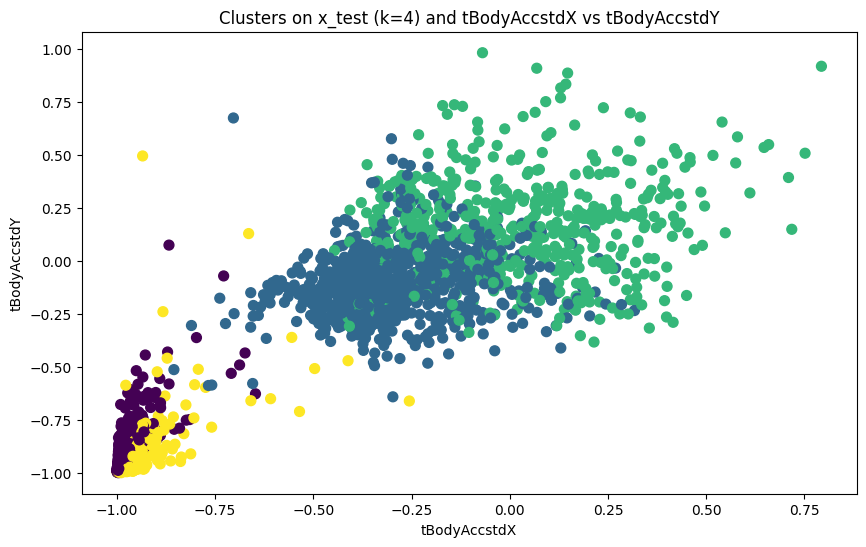

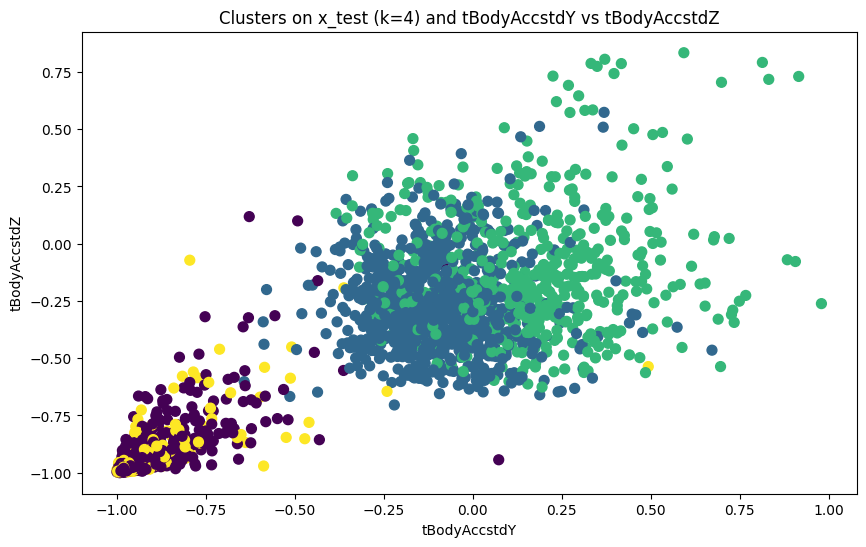

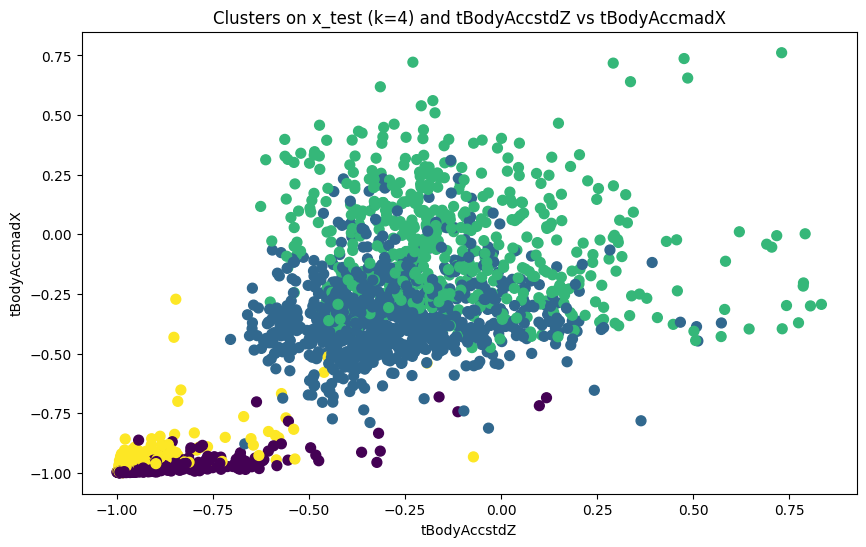

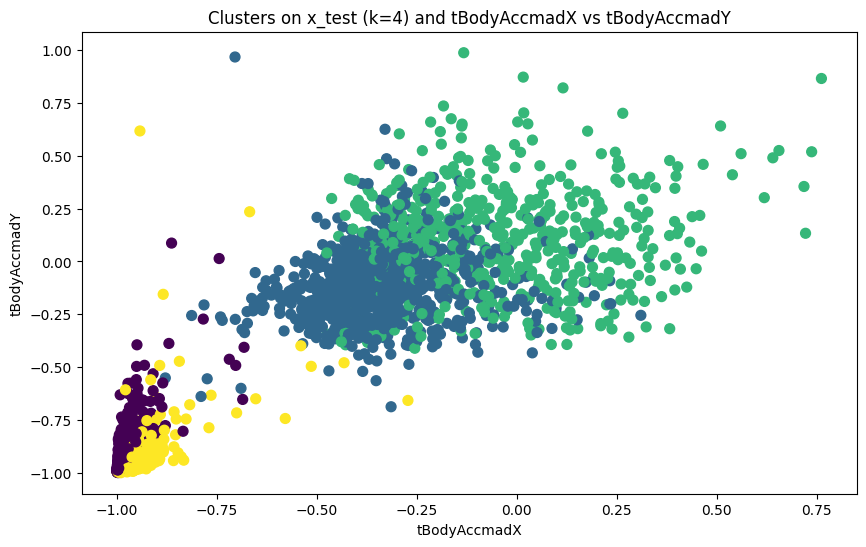

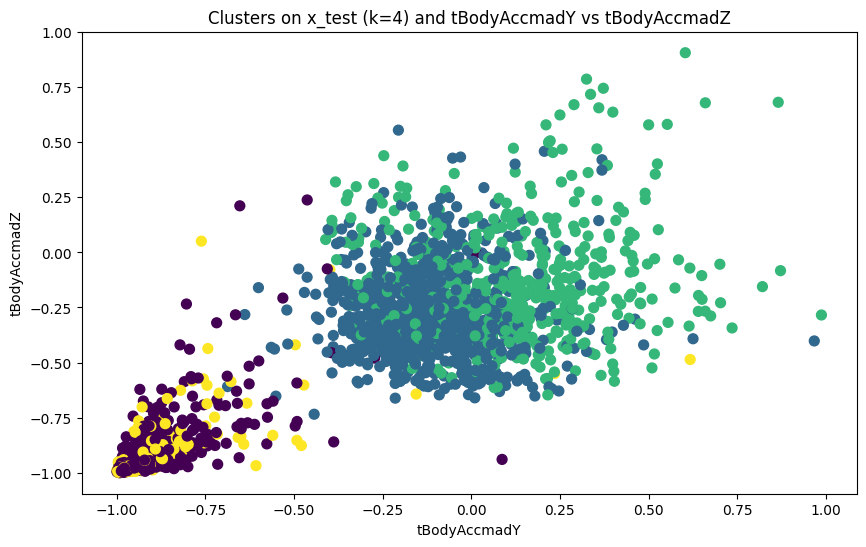

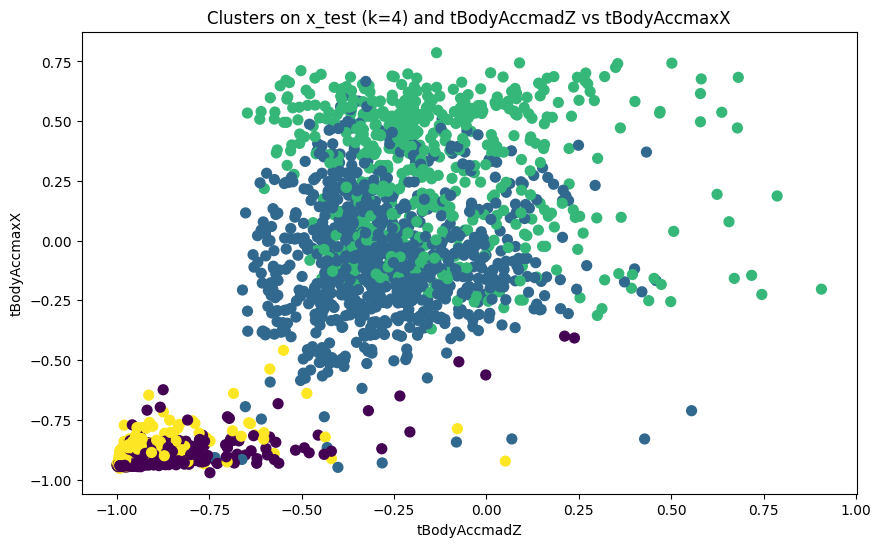

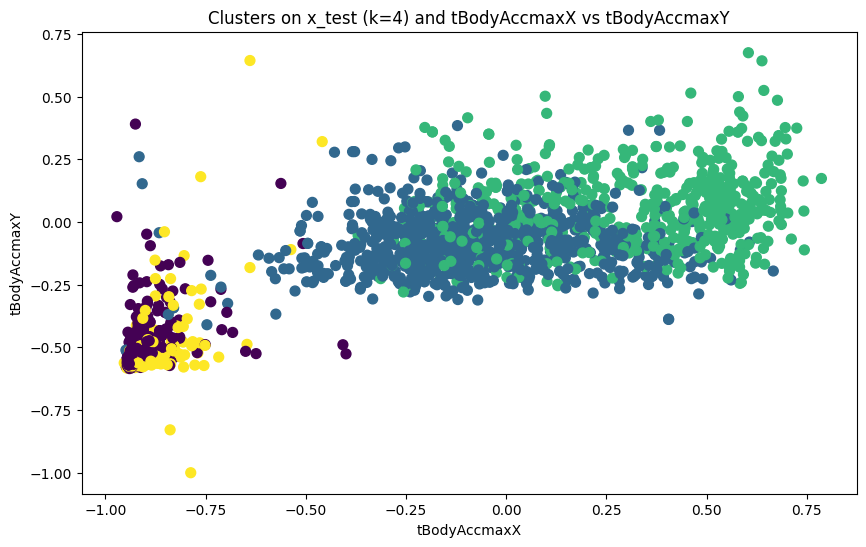

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


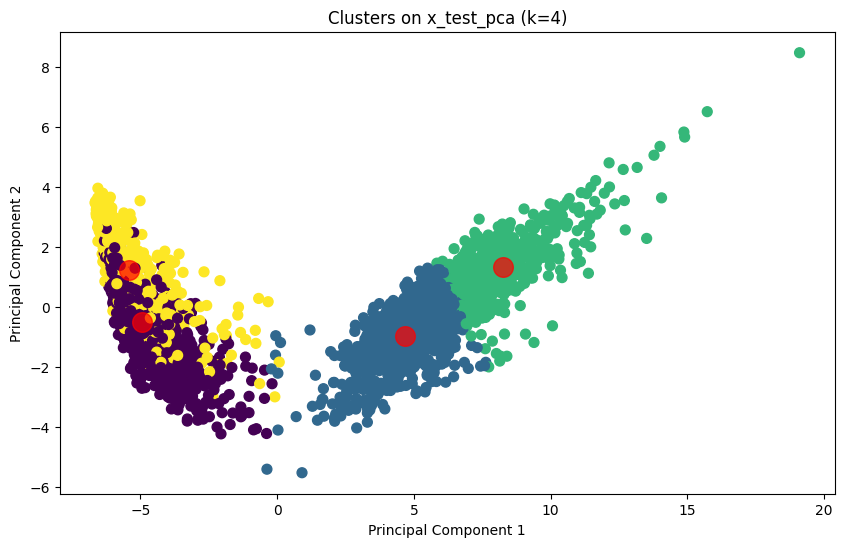

In [ ]:
# K-Means Clustering on x_test without dimensionality reduction
kmeans = KMeans(n_clusters=4, random_state=42)
x_test_array = x_test.values
y_kmeans = kmeans.fit_predict(x_test_array)

# Only visualizing 10 scatter plots because of the computing and time limitation
#we cannot visualize 25000+ plots to better read the clustering

for x in range(10):

# Visualize clusters on x_test
  plt.figure(figsize=(10, 6))
  plt.scatter(x_test_array[:, x], x_test_array[:, x+1], c=y_kmeans, s=50, cmap='viridis')
  plt.title(f'Clusters on x_test (k=4) and {x_test.columns[x]} vs {x_test.columns[x+1]}')
  plt.xlabel(x_test.columns[x])
  plt.ylabel(x_test.columns[x+1])
  plt.show()

# K-Means Clustering on x_test_pca without dimensionality reduction
kmeans_pca = KMeans(n_clusters=4, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(x_test_pca)

# Visualize clusters on x_test_pca
plt.figure(figsize=(10, 6))
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_kmeans_pca, s=50, cmap='viridis')
# Plotting centroids
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7)
plt.title('Clusters on x_test_pca (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Preparing DBScan for Selecting Best eps values and Optimal Number of Clusters

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering analysis with PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Finding optimal epsilon value for DBSCAN


In [ ]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
silhouette_scores = []
for eps in eps_values:
    clustering = DBSCAN(eps=eps, min_samples=5).fit(X_pca)
    labels_pca = clustering.labels_
    n_clusters = len(set(labels_pca)) - (1 if -1 in labels_pca else 0)
    if n_clusters > 1:
        silhouette_scores.append(metrics.silhouette_score(X_pca, labels_pca))
    else:
        silhouette_scores.append(0)  # or any other appropriate value

optimal_eps = eps_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal epsilon value for DBSCAN with PCA: {optimal_eps}")

Optimal epsilon value for DBSCAN with PCA: 0.1


# Perform clustering with optimal epsilon value


In [ ]:
clustering = DBSCAN(eps=optimal_eps, min_samples=5).fit(X_pca)
print("Number of clusters with PCA:", len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0))

Number of clusters with PCA: 0


# Perform clustering analysis without PCA

In [ ]:
# Perform clustering analysis without PCA
silhouette_scores = []
for eps in eps_values:
    clustering = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    labels_scaled = clustering.labels_
    n_clusters = len(set(labels_scaled)) - (1 if -1 in labels_scaled else 0)
    if n_clusters > 1:
        silhouette_scores.append(metrics.silhouette_score(X_scaled, labels_scaled))
    else:
        silhouette_scores.append(0)  # or any other appropriate value

optimal_eps = eps_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal epsilon value for DBSCAN without PCA: {optimal_eps}")

# Perform clustering with optimal epsilon value
clustering = DBSCAN(eps=optimal_eps, min_samples=5).fit(X_scaled)
print("Number of clusters without PCA:", len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0))

Optimal epsilon value for DBSCAN without PCA: 0.1
Number of clusters without PCA: 0


In [ ]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

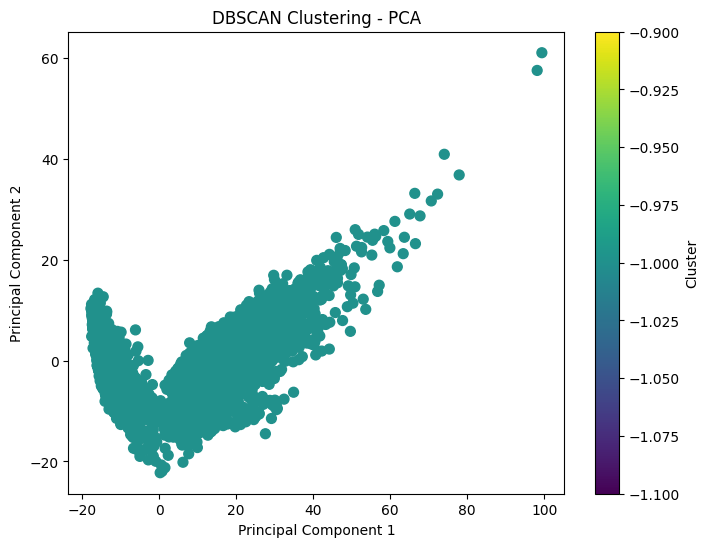

In [ ]:
plot_clusters(X_pca, labels_pca, title='DBSCAN Clustering - PCA')

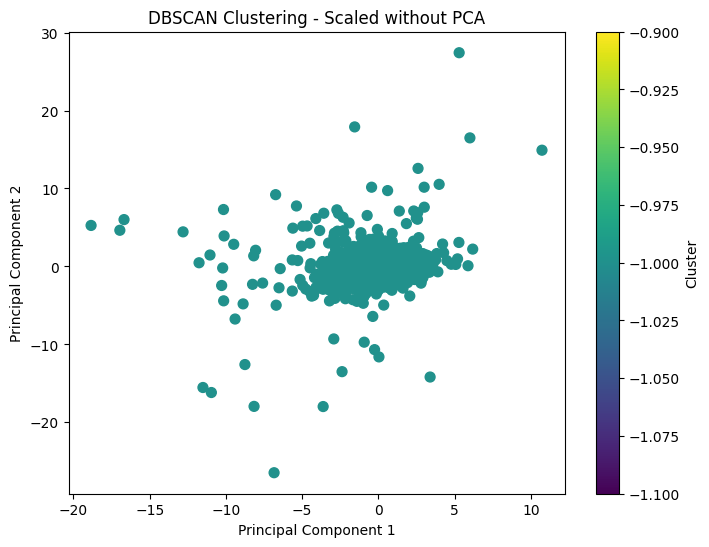

In [ ]:
plot_clusters(X_scaled, labels_pca, title='DBSCAN Clustering - Scaled without PCA')

In [ ]:
def dbscan(data, max_eps, min_samples):
    results = []
    silhouette_scores = []
    calinski_scores = []
    davies_score = []
    for eps in np.arange(0.1, max_eps, 0.1):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        # Calculate evaluation metrics
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
          silhouette_scores.append(metrics.silhouette_score(data, labels))
          calinski_scores.append(metrics.calinski_harabasz_score(data, labels))
          davies_score.append(metrics.davies_bouldin_score(data, labels))
        else:
          silhouette_scores.append(0)  # or any other appropriate value
          calinski_scores.append(0)
          davies_score.append(0)

        # Cluster statistics
        n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)  # Exclude noise points
        cluster_sizes = [sum(labels == i) for i in range(n_clusters)]

        # Store results
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'labels': labels,
            'n_clusters': n_clusters,
            'cluster_sizes': cluster_sizes,
            'silhouette_score': silhouette_scores,
            'calinski_harabasz_score': calinski_scores,
            'davies_bouldin_score': davies_score
        })

    return results

def plot_silhouette_scores(max_eps, silhouette_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(0.1, max_eps, 0.1), silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. Eps')
    plt.xlabel('Eps')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

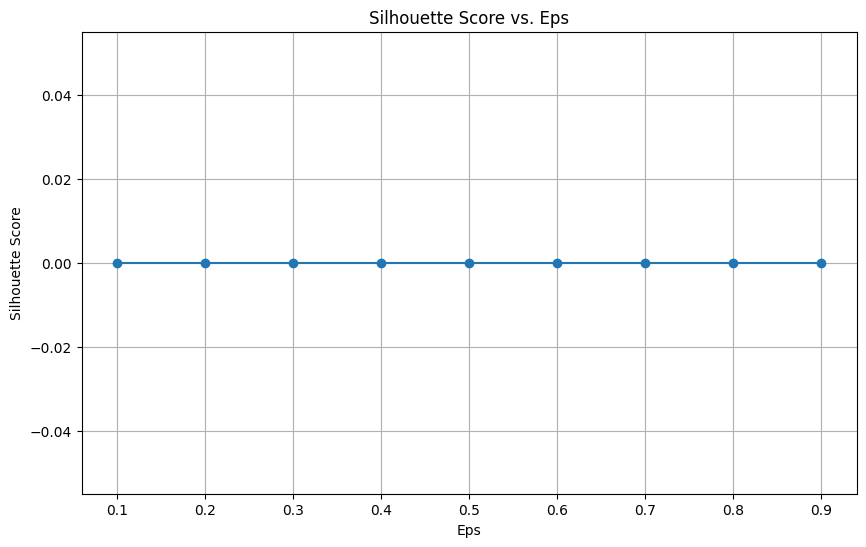

In [ ]:
max_eps = 1.0  # Max value of eps to try
min_samples = 5  # Value of min_samples to use
results = dbscan(X_pca, max_eps, min_samples)
# plot_silhouette_scores(max_eps, silhouette_scores)
plot_silhouette_scores(max_eps, results[1]['silhouette_score'])


In [ ]:
results[5]

{'eps': 0.6,
 'min_samples': 5,
 'labels': array([-1, -1, -1, ..., -1, -1, -1]),
 'n_clusters': 0,
 'cluster_sizes': [],
 'silhouette_score': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'calinski_harabasz_score': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'davies_bouldin_score': [0, 0, 0, 0, 0, 0, 0, 0, 0]}